In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from utils import building_unit_types, adoption_tiers
import os
import pickle
import numpy as np

In [2]:
city_names = ["columbus"]
unit_numbers = [8]#,800]
# unit_type_to_color = ["red", "purple", "teal", "gold", "navy", "magenta", "lime", "black"]


In [3]:
# def is_successful_upgrade(city_name, unit_type):
#     file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
#     if os.path.exists(file_name):
#         output = pd.read_csv(file_name)
#         return output.loc[0,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"
#     return False
def fill_a_table(table_filling_fn=None):
    # print(f"Filling a table with {'is_successful_upgrade' if table_filling_fn is None else table_filling_fn.__name__}")
    table_to_fill = pd.DataFrame(columns=unit_numbers, index=adoption_tiers)
    city_name = "columbus"
    for unit_num in unit_numbers:
        for unit_type in building_unit_types:
            file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
            print(file_name)

            if os.path.exists(file_name):
                print(file_name)
                output = pd.read_csv(file_name)
                print(output.columns)
                # print(output.loc[0,"hvac_has_ducts"])
                for adoption_tier in adoption_tiers:
                    table_to_fill.loc[adoption_tier,unit_num] = table_filling_fn((output, adoption_tier)) 
            else:
                table_to_fill.loc[adoption_tier,unit_num] =  None
            # is_successful_upgrade(city_name, unit_type) if table_filling_fn is None else table_filling_fn(city_name, unit_type)
            
    return table_to_fill



# def table_of_success_failure():
#     return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"))

def table_of_tier():
    return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] == x[1]))

def table_of_hvac_has_ducts():
    return fill_a_table(lambda x: x[0].loc[:,"hvac_has_ducts"] == "Yes")

In [11]:
# success_failure_table = table_of_success_failure()

In [32]:
city_name = "minneapolis"
unit_type = "SFD"
file_name = os.path.join(os.getcwd(), "cmu-tare-model", "output_results",f"{city_name}_upgrades_91_{unit_type}_unit_residence", "tare_output.csv")
# if not os.path.exists(file_name):
    # pass
print(file_name)
output = pd.read_csv(file_name)
print(output.shape)
adopting_output = output[output["iraRef_mp8_heating_adoption"] != "Tier 4: Averse"]


/mnt/c/Users/Arnav/Documents/Research/Trane_Technologies/cmu-tare-model/output_results/minneapolis_upgrades_91_SFD_unit_residence/tare_output.csv
(80, 287)


In [39]:
adopting_output

,Unnamed: 0,applicable_upgrade_x,bldg_id,census_division,state,city,puma,county,reeds_balancing_area,income,...,preIRA_mp8_heating_additional_public_benefit,preIRA_mp8_heating_total_npv_lessWTP,preIRA_mp8_heating_total_npv_moreWTP,preIRA_mp8_heating_adoption,preIRA_mp8_heating_retrofit_publicImpact,iraRef_mp8_heating_additional_public_benefit,iraRef_mp8_heating_total_npv_lessWTP,iraRef_mp8_heating_total_npv_moreWTP,iraRef_mp8_heating_adoption,iraRef_mp8_heating_retrofit_publicImpact
0,0,True,1,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,54999.5,...,0.0,-26429.55,-23883.96,Tier 4: Averse,Public Benefit,31344.15,5238.51,7784.10,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
1,1,True,2,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,129999.5,...,0.0,-19864.51,-17418.02,Tier 4: Averse,Public Benefit,20950.46,1281.83,3728.32,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
3,3,True,5,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,NaN,...,0.0,-12541.68,-10169.21,Tier 4: Averse,Public Benefit,12875.66,420.81,2793.28,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
5,5,True,8,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,89999.5,...,0.0,-14644.55,-12351.00,Tier 4: Averse,Public Benefit,20100.54,5638.79,7932.34,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
6,6,True,9,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,129999.5,...,0.0,-22084.88,-19629.76,Tier 4: Averse,Public Benefit,24527.30,2712.32,5167.44,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,True,86,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,189999.5,...,0.0,-34285.21,-31410.36,Tier 4: Averse,Public Benefit,40133.20,6206.14,9080.99,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
76,76,True,87,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,47499.5,...,0.0,-11477.61,-9211.52,Tier 4: Averse,Public Benefit,11504.09,129.72,2395.81,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
77,77,True,88,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,64999.5,...,0.0,-20497.08,-18042.41,Tier 4: Averse,Public Benefit,32971.57,12725.95,15180.62,Tier 3: Subsidy-Dependent Feasibility,Public Benefit
78,78,True,89,West North Central,MN,"MN, Minneapolis","MN, 01405","MN, Hennepin County",43,22499.5,...,0.0,-17564.51,-15255.93,Tier 4: Averse,Public Benefit,15311.50,-2105.25,203.33,Tier 3: Subsidy-Dependent Feasibility,Public Benefit


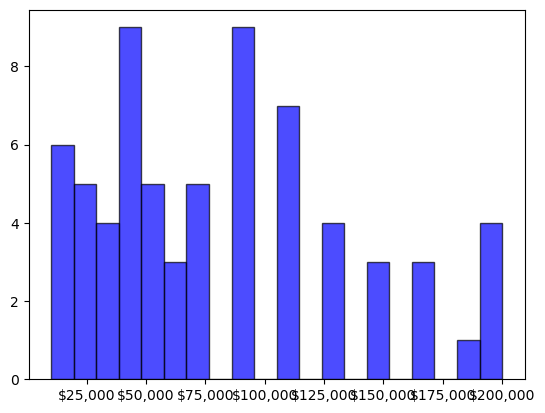

In [38]:
plt.hist(adopting_output["income"], bins=20, color='blue', edgecolor='black', alpha=0.7)
# ax = plt.gca()  # Get the current axis
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# adopting_output.plot("income")

<BarContainer object of 3 artists>

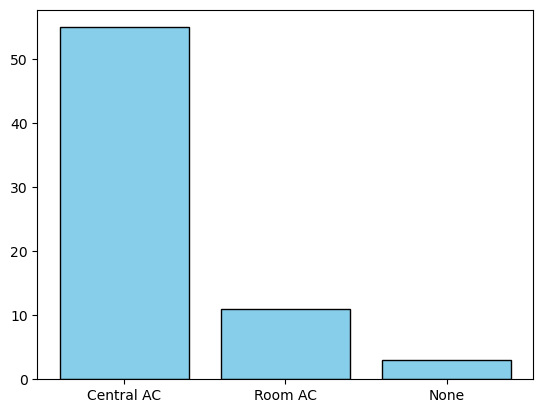

In [40]:
category_counts = adopting_output["hvac_cooling_type"].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')


<BarContainer object of 2 artists>

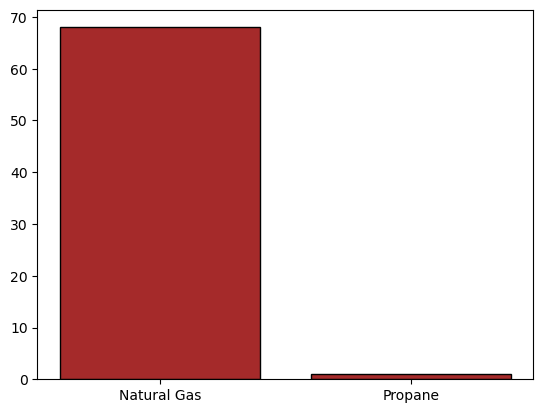

In [42]:
category_counts = adopting_output["base_heating_fuel"].value_counts()
plt.bar(category_counts.index, category_counts.values, color='brown', edgecolor='black')


In [9]:
success_failure_table

,8,800
Existing Equipment,7,572
Tier 1: Feasible,7,572
Tier 2: Feasible vs. Alternative,7,572
Tier 3: Subsidy-Dependent Feasibility,7,572
Feasible per MMPV,7,572


In [60]:
has_ducts_table = table_of_hvac_has_ducts()

In [61]:
has_ducts_table

,columbus,minneapolis
2,True,True
3_4,True,True
5_9,None,True
10_19,None,None
20_49,None,True
50_plus,None,True
SFA,True,True
SFD,True,True


In [51]:
# def table_of_tier():
#     return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] == x[1]))
num_residences = 800
table_to_fill = pd.DataFrame(index=adoption_tiers)
city_name = "columbus"
all_filenames = dict()
all_filenames[f"{num_residences}_NPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_NPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt95_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt95_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt9_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt9_DRpt07"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt5_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt5_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt5_DRpt07"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt5_DISCOUNTpt07_tare_output.csv")
# all_filenames["8_MMPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{8}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# all_filenames["800_NPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_NPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# all_filenames["800_MMPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")

for scenario, file_name in all_filenames.items():
    if os.path.exists(file_name):
        output = pd.read_csv(file_name)
        for adoption_tier in adoption_tiers:
            table_to_fill.loc[adoption_tier,scenario] = sum(output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier)# table_filling_fn((output, adoption_tier)) 
    else:
        table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill

,800_NPV,800_MMPV_ALPHApt95_DRpt02,800_MMPV_ALPHApt9_DRpt02,800_MMPV_ALPHApt9_DRpt07,800_MMPV_ALPHApt5_DRpt02,800_MMPV_ALPHApt5_DRpt07
Existing Equipment,0.0,0.0,0.0,0.0,0.0,0.0
Tier 1: Feasible,0.0,0.0,0.0,0.0,0.0,0.0
Tier 2: Feasible vs. Alternative,10.0,6.0,7.0,10.0,7.0,10.0
Tier 3: Subsidy-Dependent Feasibility,217.0,57.0,62.0,215.0,60.0,226.0
Feasible per MMPV,0.0,125.0,299.0,343.0,565.0,400.0
Tier 4: Averse,434.0,473.0,293.0,93.0,29.0,25.0


In [52]:
table_to_fill.to_csv(os.path.join("output_results", f"comparing_columbus_{num_residences}_across_npv_and_MMPV.csv"))

In [14]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_800_all_unit_residence", f"100_cluster_labels.pkl"), "rb") as f:
    kmeans_resstock_100_labels_ = pickle.load(f)

unique_labels = np.unique(kmeans_resstock_100_labels_)

len(kmeans_resstock_100_labels_)

661

In [15]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_800_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
    building_IDs = pickle.load(f)

len(building_IDs)

661

In [41]:
table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
city_name = "columbus"
file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# for unit_num in unit_numbers:
#     for unit_type in building_unit_types:
#         all_filenames.append()
        
        # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
        # print(file_name)
if os.path.exists(file_name):
    # print(file_name)
    output = pd.read_csv(file_name)
    # print(output.columns)
    # print(output.loc[0,"hvac_has_ducts"])
    for adoption_tier in adoption_tiers:
        for cluster_label in unique_labels:
            print(adoption_tier)
            print(cluster_label)
            is_in_this_cluster = pd.Series(kmeans_resstock_100_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
            is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
            # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
            table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
else:
    table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill

Existing Equipment
0
Existing Equipment
1
Existing Equipment
2
Existing Equipment
3
Existing Equipment
4
Existing Equipment
5
Existing Equipment
6
Existing Equipment
7
Existing Equipment
8
Existing Equipment
9
Existing Equipment
10
Existing Equipment
11
Existing Equipment
12
Existing Equipment
13
Existing Equipment
14
Existing Equipment
15
Existing Equipment
16
Existing Equipment
17
Existing Equipment
18
Existing Equipment
19
Existing Equipment
20
Existing Equipment
21
Existing Equipment
22
Existing Equipment
23
Existing Equipment
24
Existing Equipment
25
Existing Equipment
26
Existing Equipment
27
Existing Equipment
28
Existing Equipment
29
Existing Equipment
30
Existing Equipment
31
Existing Equipment
32
Existing Equipment
33
Existing Equipment
34
Existing Equipment
35
Existing Equipment
36
Existing Equipment
37
Existing Equipment
38
Existing Equipment
39
Existing Equipment
40
Existing Equipment
41
Existing Equipment
42
Existing Equipment
43
Existing Equipment
44
Existing Equipment
4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Existing Equipment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tier 1: Feasible,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tier 2: Feasible vs. Alternative,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Tier 3: Subsidy-Dependent Feasibility,0,5,0,2,2,1,6,3,1,1,...,0,1,0,3,2,0,2,3,3,0
Feasible per MMPV,1,6,0,8,3,0,4,7,3,0,...,0,0,0,3,1,2,2,3,5,0
Tier 4: Averse,1,3,4,0,0,0,1,1,0,0,...,1,1,1,0,4,0,0,1,1,1


In [29]:
table_to_fill.to_csv(os.path.join("output_results", "comparing_clusters_of_columbus_800_MMPV.csv"))

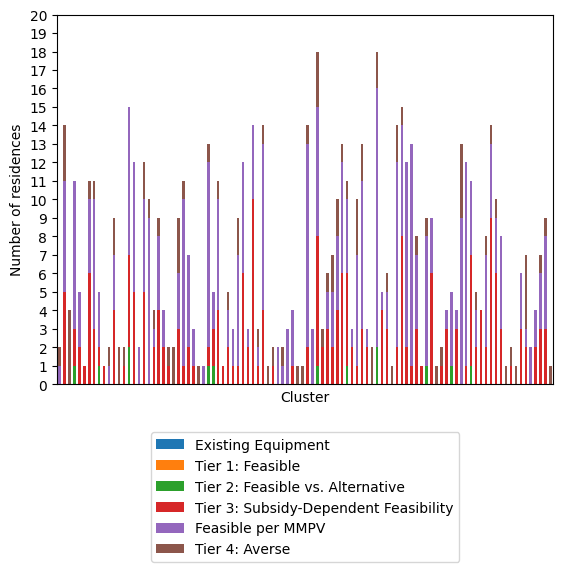

In [39]:
table_to_fill.T.plot(kind='bar', stacked=True)
plt.xticks([])
plt.yticks(range(21))
plt.xlabel("Cluster")
plt.ylabel("Number of residences")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
plt.show()

Existing Equipment
0
Existing Equipment
1
Existing Equipment
2
Existing Equipment
3
Tier 1: Feasible
0
Tier 1: Feasible
1
Tier 1: Feasible
2
Tier 1: Feasible
3
Tier 2: Feasible vs. Alternative
0
Tier 2: Feasible vs. Alternative
1
Tier 2: Feasible vs. Alternative
2
Tier 2: Feasible vs. Alternative
3
Tier 3: Subsidy-Dependent Feasibility
0
Tier 3: Subsidy-Dependent Feasibility
1
Tier 3: Subsidy-Dependent Feasibility
2
Tier 3: Subsidy-Dependent Feasibility
3
Feasible per MMPV
0
Feasible per MMPV
1
Feasible per MMPV
2
Feasible per MMPV
3
Tier 4: Averse
0
Tier 4: Averse
1
Tier 4: Averse
2
Tier 4: Averse
3
                                       0  1  2  3
Existing Equipment                     0  0  0  0
Tier 1: Feasible                       0  0  0  0
Tier 2: Feasible vs. Alternative       0  0  0  0
Tier 3: Subsidy-Dependent Feasibility  1  0  1  0
Feasible per MMPV                      0  4  0  1
Tier 4: Averse                         0  0  0  0


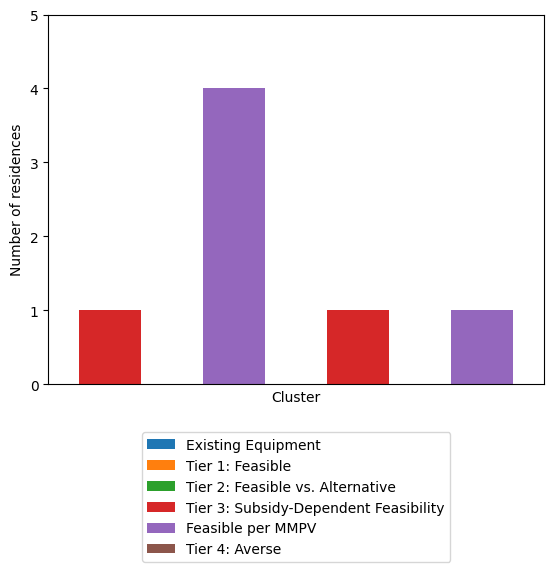

In [43]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_8_all_unit_residence", f"4_cluster_labels.pkl"), "rb") as f:
    kmeans_resstock_4_labels_ = pickle.load(f)

unique_labels = np.unique(kmeans_resstock_4_labels_)

len(kmeans_resstock_4_labels_)

with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_8_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
    building_IDs = pickle.load(f)

len(building_IDs)

table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
city_name = "columbus"
file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{8}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# for unit_num in unit_numbers:
#     for unit_type in building_unit_types:
#         all_filenames.append()
        
        # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
        # print(file_name)
if os.path.exists(file_name):
    # print(file_name)
    output = pd.read_csv(file_name)
    # print(output.columns)
    # print(output.loc[0,"hvac_has_ducts"])
    for adoption_tier in adoption_tiers:
        for cluster_label in unique_labels:
            print(adoption_tier)
            print(cluster_label)
            is_in_this_cluster = pd.Series(kmeans_resstock_4_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
            is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
            # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
            table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
else:
    table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill.to_csv(os.path.join("output_results", "comparing_clusters_of_columbus_8_MMPV.csv"))
print(table_to_fill)

table_to_fill.T.plot(kind='bar', stacked=True)
plt.xticks([])
plt.yticks(range(6))
plt.xlabel("Cluster")
plt.ylabel("Number of residences")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
plt.show()

In [4]:
def create_stacked_bar_chart(num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime

    with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_{num_residences}_all_unit_residence", f"4_cluster_labels.pkl"), "rb") as f:
        kmeans_resstock_labels_ = pickle.load(f)
    
    # print(kmeans_resstock_labels_)

    unique_labels = np.unique(kmeans_resstock_labels_)

    # len(kmeans_resstock_labels_)

    with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_{num_residences}_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
        building_IDs = pickle.load(f)

    # len(building_IDs)

    table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
    city_name = "columbus"
    file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
    # for unit_num in unit_numbers:
    #     for unit_type in building_unit_types:
    #         all_filenames.append()
            
            # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
            # print(file_name)
    if os.path.exists(file_name):
        # print(file_name)
        output = pd.read_csv(file_name)
        # print(output.columns)
        # print(output.loc[0,"hvac_has_ducts"])
        for adoption_tier in adoption_tiers:
            for cluster_label in unique_labels:
                # print(adoption_tier)
                # print(cluster_label)
                is_in_this_cluster = pd.Series(kmeans_resstock_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
                is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
                table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
    else:
        raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv")
        # table_to_fill.loc[adoption_tier,scenario] =  None

    table_to_fill.to_csv(os.path.join("output_results", f"comparing_clusters_of_columbus_{num_residences}_{scenario}.csv"))
    # print(table_to_fill)

    table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    plt.xticks(rotation=0)
    # plt.yticks(range(max(table_to_fill.loc[:,scenario])))
    plt.xlabel("Cluster")
    plt.ylabel("Number of residences")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    plt.title(scenario)

    if save_fig:
        plt.savefig(os.path.join("output_results", f"columbus_{num_residences}_all_unit_residence", f"tiers_of_columbus_{num_residences}_{scenario}.svg"))
    plt.show()




[1 0 0 3 2 0 0]


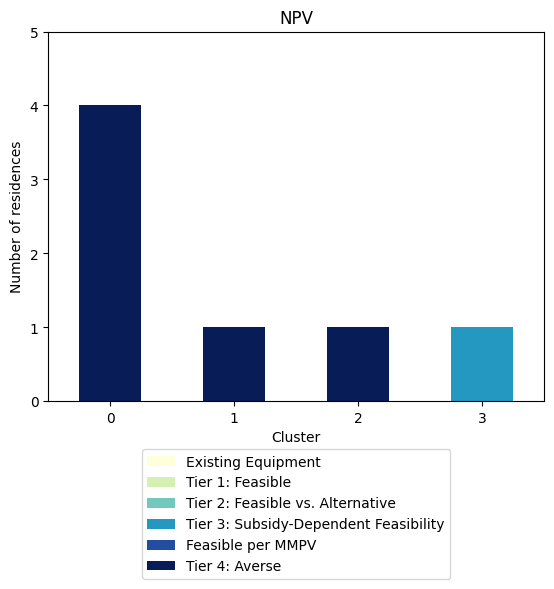

In [28]:
num_residences = 8
scenario = "NPV" #"MMPV_ALPHApt95_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario, save_fig = True) #  prefix="no_cooling_benefits_25_year_lifetime", 

In [ ]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt07"

create_stacked_bar_chart(num_residences, scenario)

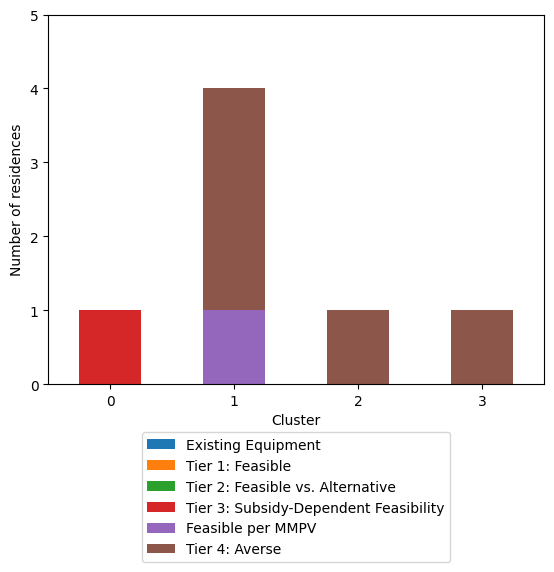

In [64]:
num_residences = 8
scenario = "MMPV_ALPHApt95_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

In [38]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

[1 0 0 3 2 0 0]


Exception: no file found for alpha_beta_MMPV_ALPHApt9_DISCOUNTpt02_tare_output.csv

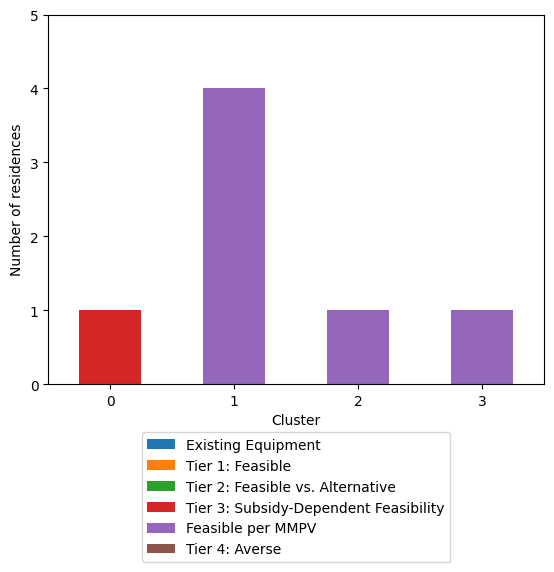

In [4]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt07" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

In [47]:
def table_of_heating_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_heating_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_heating_consumption():
    heating_consumption_table = table_of_heating_consumption()
    # print(heating_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(heating_consumption_table.loc[unit_type,city])
            if heating_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(heating_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Heating Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(heating_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("heating_consumption_comparison.svg", bbox_inches="tight")
    return heating_consumption_table

In [8]:
# heating_consumption_table = graph_heating_consumption()

NameError: name 'graph_heating_consumption' is not defined

In [49]:
def table_of_cooling_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_cooling_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_cooling_consumption():
    cooling_consumption_table = table_of_cooling_consumption()
    # print(cooling_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(cooling_consumption_table.loc[unit_type,city])
            if cooling_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(cooling_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Cooling Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(cooling_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("cooling_consumption_comparison.svg", bbox_inches="tight")
    return cooling_consumption_table

In [50]:
# graph_cooling_consumption()

KeyError: 'baseline_2024_cooling_consumption'

In [76]:
def table_of_NPV_calculations():
    col_names = [
        "iraRef_mp8_heating_public_npv",
        "iraRef_mp8_heating_total_capitalCost",
        "iraRef_mp8_heating_net_capitalCost",
        "iraRef_mp8_heating_private_npv_lessWTP",
        "iraRef_mp8_heating_private_npv_moreWTP",
    # "iraRef_mp8_heating_additional_public_benefit",
    # "iraRef_mp8_heating_total_npv_lessWTP",
    # "iraRef_mp8_heating_total_npv_moreWTP",
    ]
    # col_map = {"iraRef_mp8_heating_public_npv": "Public NPV",
    #             "iraRef_mp8_heating_total_capitalCost": "Capital Cost",
    #             "iraRef_mp8_heating_additional_public_benefit": "Additional Public Benefit",
    #             "iraRef_mp8_heating_total_npv_lessWTP": "NPV Lower Bound",
    #             "iraRef_mp8_heating_total_npv_moreWTP": "NPV Upper Bound"}
    new_col_names = [
        "Public NPV",
        "Total Capital Cost",
        "Net Capital Cost",
        "Private NPV Lower Bound",
        "Private NPV Upper Bound",
        # "Additional Public Benefit",
        # "NPV Lower Bound",
        # "NPV Upper Bound",
        ]
    intermediate_table = fill_a_table(lambda x: [x.loc[0,col_name] for col_name in col_names])
    new_columns = pd.MultiIndex.from_product([intermediate_table.columns, new_col_names])
    new_df = pd.DataFrame(index=intermediate_table.index, columns=new_columns)
    # Fill the new DataFrame with split list values or None
    for col in intermediate_table.columns:
        for i, val in intermediate_table[col].items():
            if isinstance(val, list):
                # If it's a list, spread the values across the 5 columns
                new_df.loc[i, col] = val
            else:
                # If it's None, fill with None in all 5 sub-columns
                new_df.loc[i, col] = [None] * len(col_names)
    return new_df

In [77]:
# NPV_calculations_table = table_of_NPV_calculations()

In [78]:
# NPV_calculations_table

columbus                                      \
        Public NPV Total Capital Cost Net Capital Cost   
2          4588.53            8673.15          6475.49   
3_4        4886.31            7243.37          5042.54   
5_9           None               None             None   
10_19         None               None             None   
20_49         None               None             None   
50_plus       None               None             None   
SFA        6913.51            6246.61          4035.42   
SFD       12642.34           10360.68          8054.59   

                                                        minneapolis  \
        Private NPV Lower Bound Private NPV Upper Bound  Public NPV   
2                     -11167.12                -8969.46     7927.43   
3_4                    -9841.19                -7640.36     7927.43   
5_9                        None                    None     4274.12   
10_19                      None                    None        None   
20_49                      None                    None         0.0   
50_plus                    None                    None     2789.09   
SFA                    -9479.06                -7267.87    12968.07   
SFD                   -16281.86               -13975.77     9853.69   

                                                                     \
        Total Capital Cost Net Capital Cost Private NPV Lower Bound   
2                  7835.42          5618.48                -9797.17   
3_4                8738.02          6521.08               -10699.77   
5_9                5828.99          3660.55                -6983.78   
10_19                 None             None                    None   
20_49              6130.51          4035.96                -8267.85   
50_plus            6152.13          4005.42                -6876.31   
SFA                7569.41          5333.97               -10694.06   
SFD                9039.38           6814.3               -11442.24   

                                 
        Private NPV Upper Bound  
2                      -7580.23  
3_4                    -8482.83  
5_9                    -4815.34  
10_19                      None  
20_49                   -6173.3  
50_plus                 -4729.6  
SFA                    -8458.62  
SFD                    -9217.16

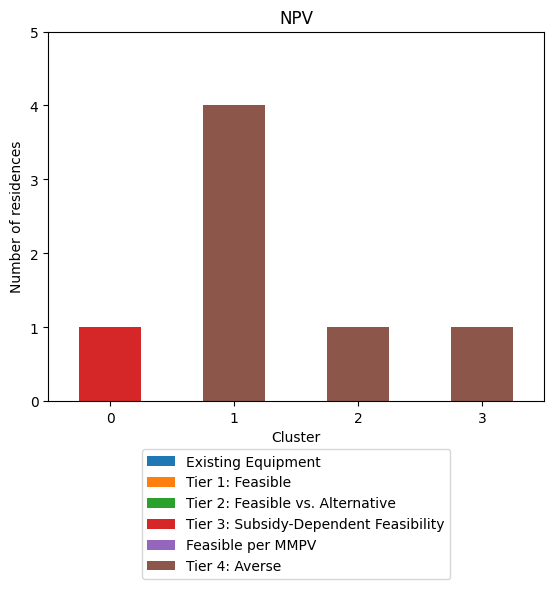

In [59]:
create_stacked_bar_chart(8, "NPV", prefix="alpha_beta")

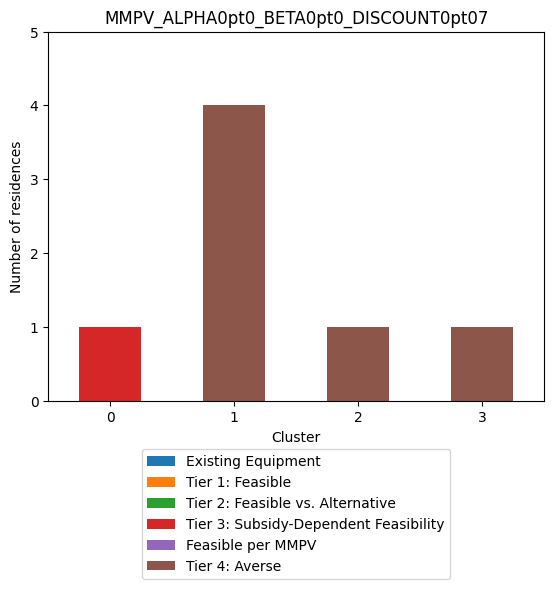

In [60]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

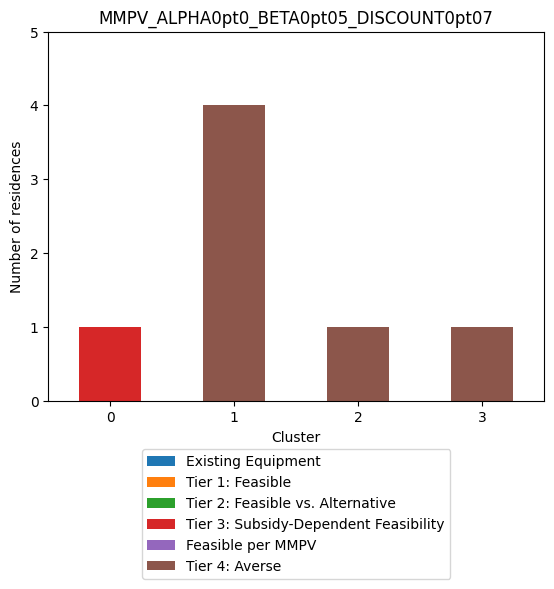

In [61]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

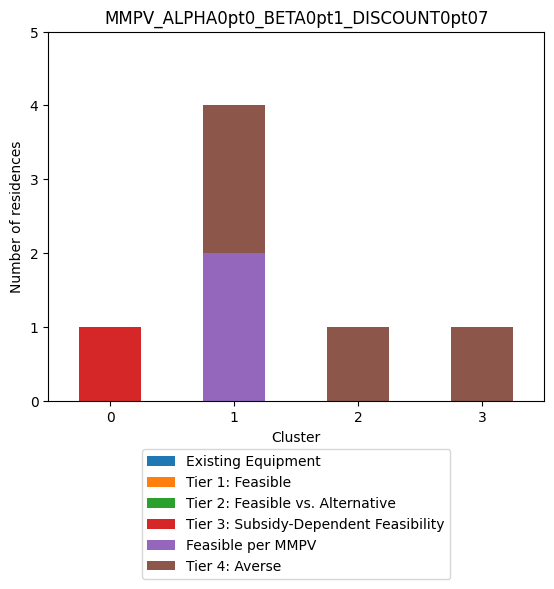

In [62]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

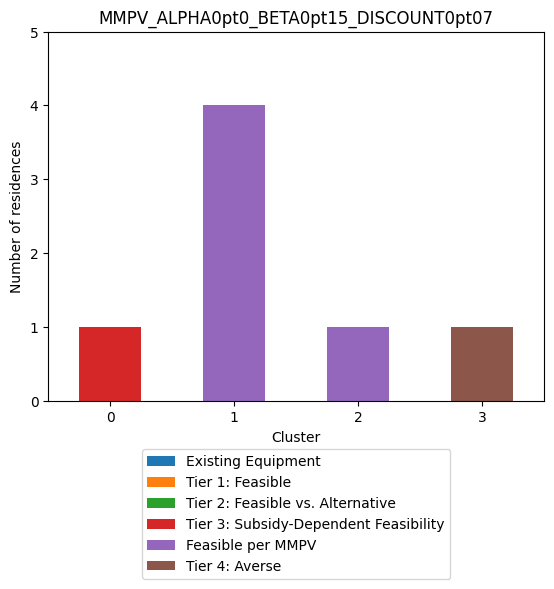

In [63]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

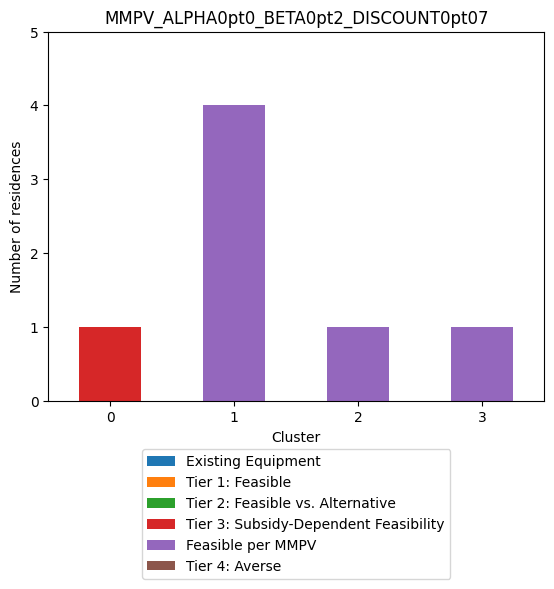

In [64]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

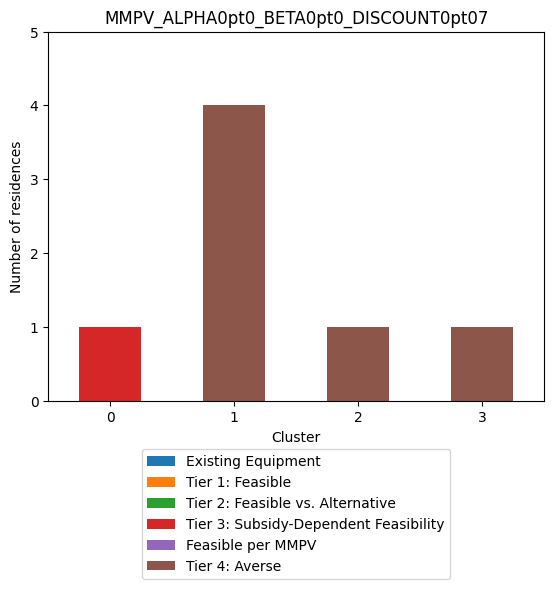

In [65]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

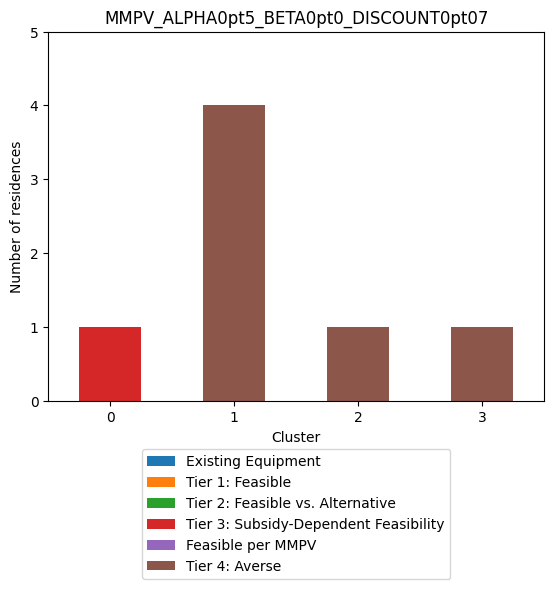

In [66]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

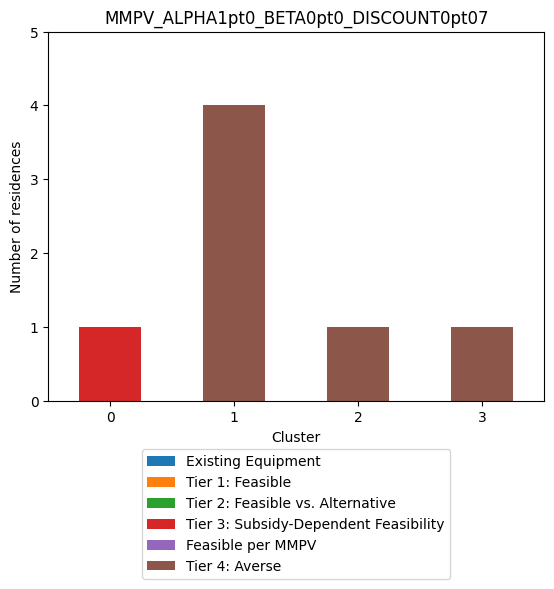

In [68]:
create_stacked_bar_chart(8, "MMPV_ALPHA1pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

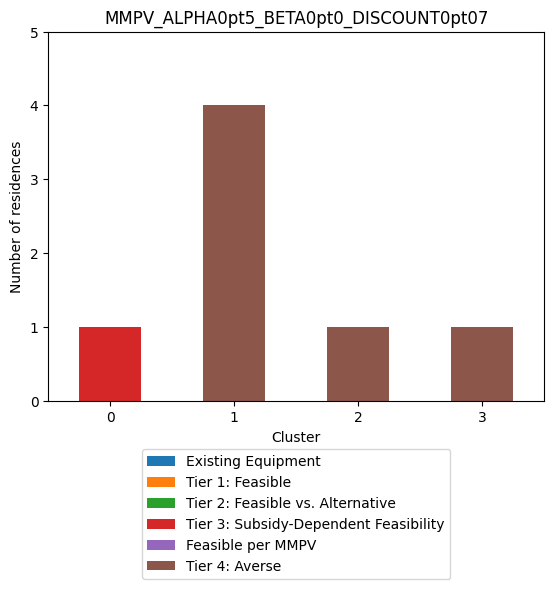

In [30]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

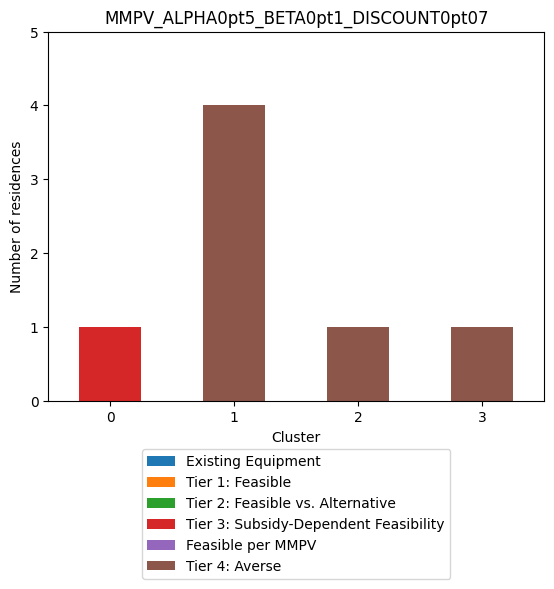

In [31]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

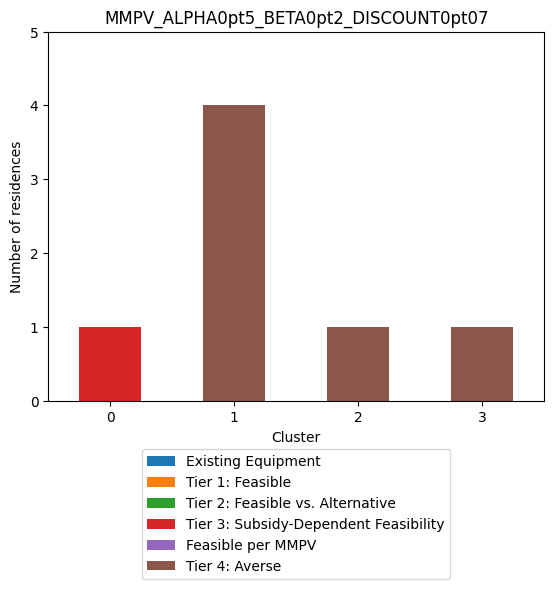

In [32]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

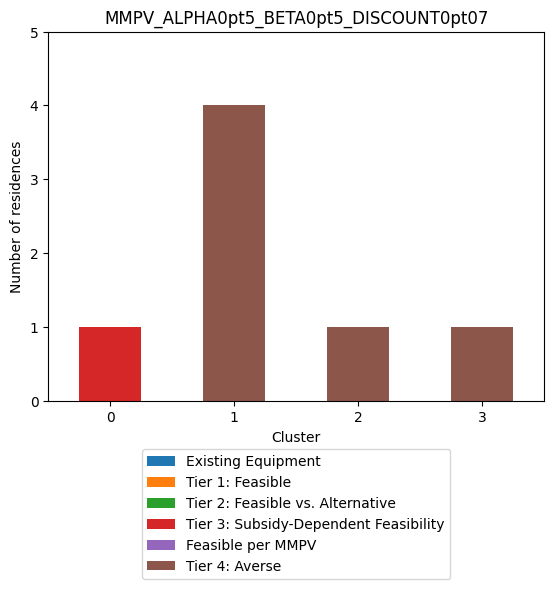

In [33]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt5_DISCOUNT0pt07", prefix="alpha_beta")

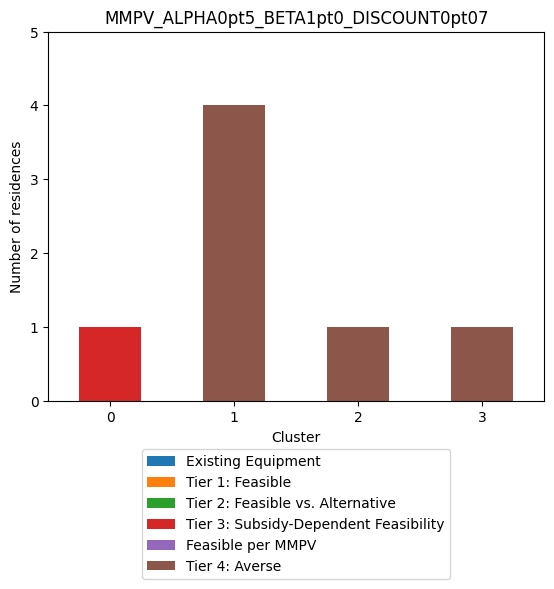

In [34]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA1pt0_DISCOUNT0pt07", prefix="alpha_beta")

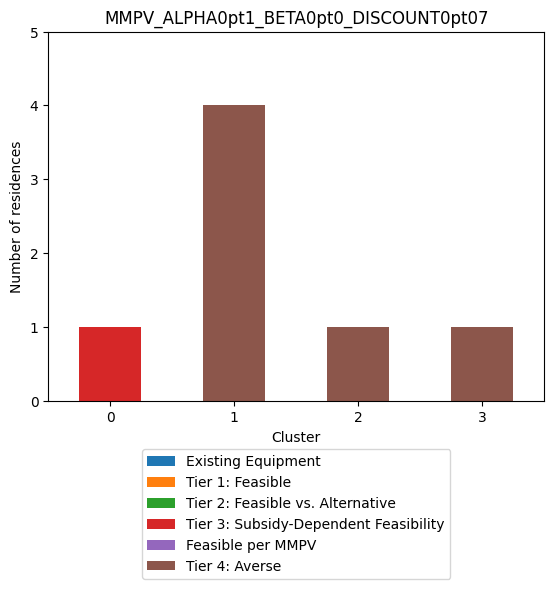

In [35]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

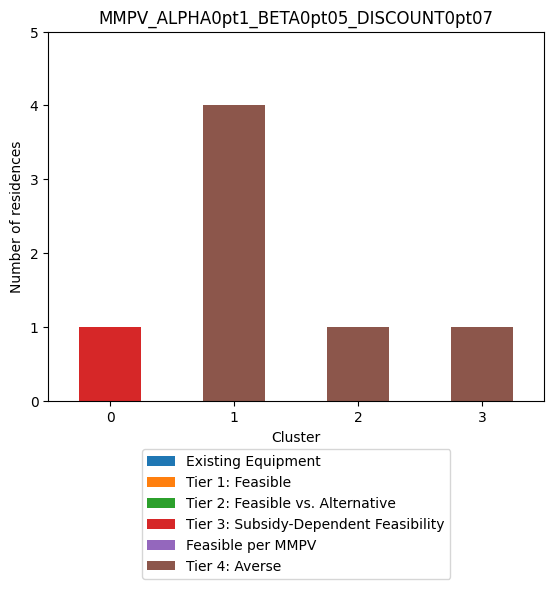

In [37]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

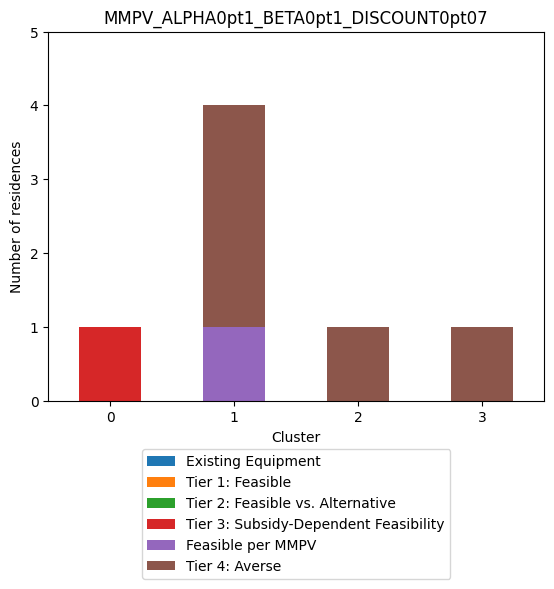

In [38]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

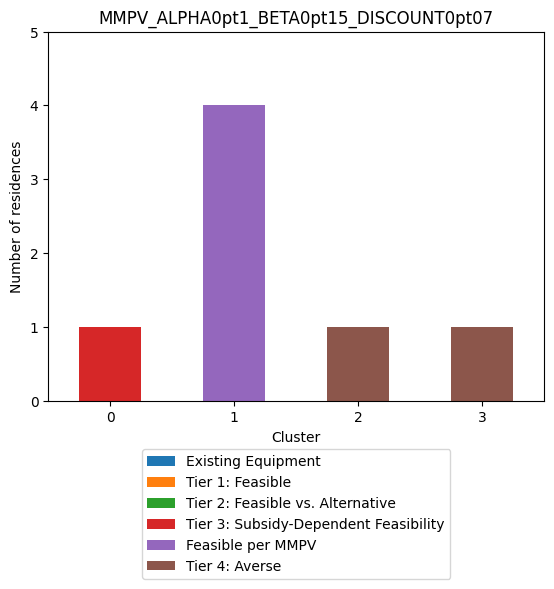

In [39]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

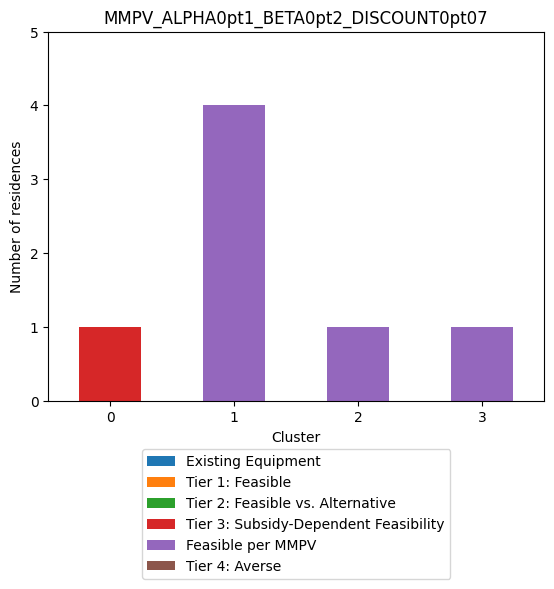

In [40]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

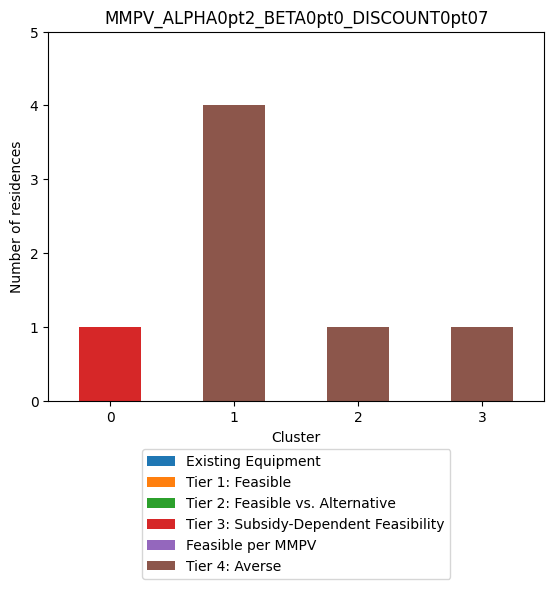

In [41]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

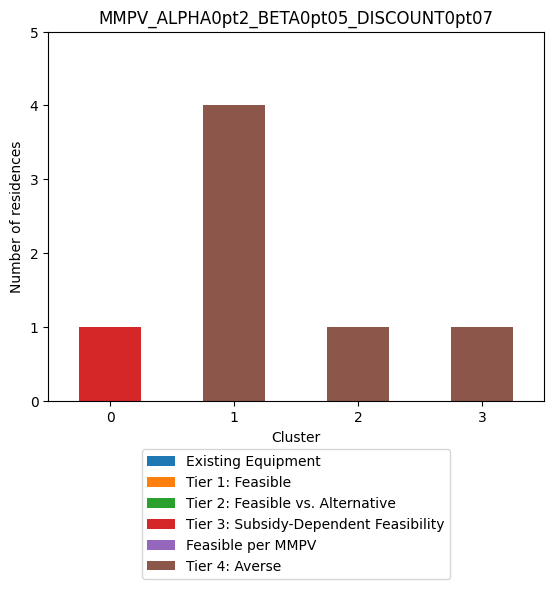

In [42]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


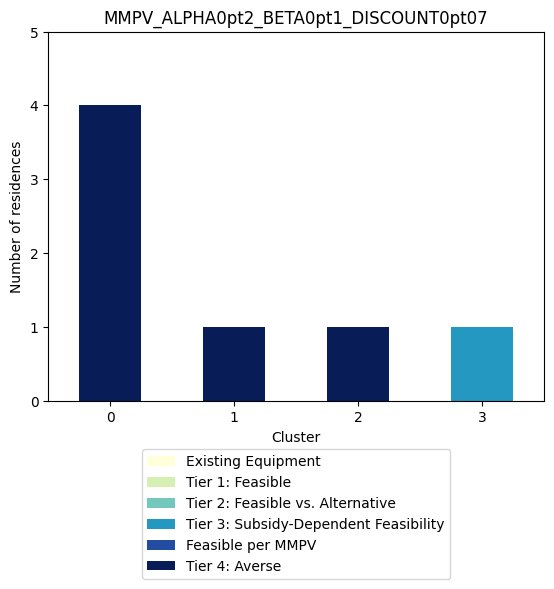

In [30]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


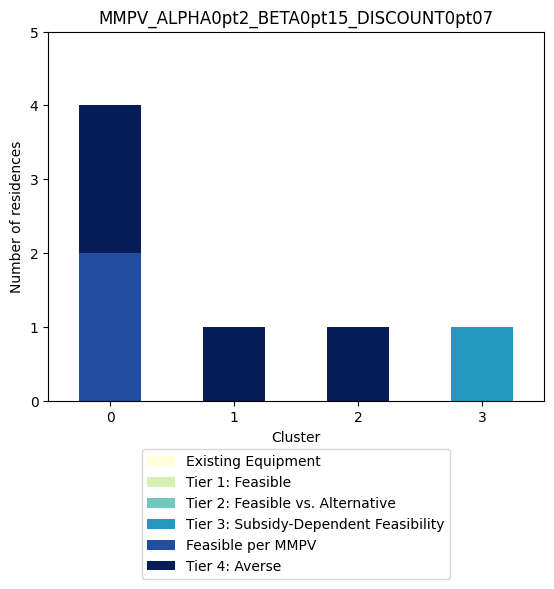

In [31]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


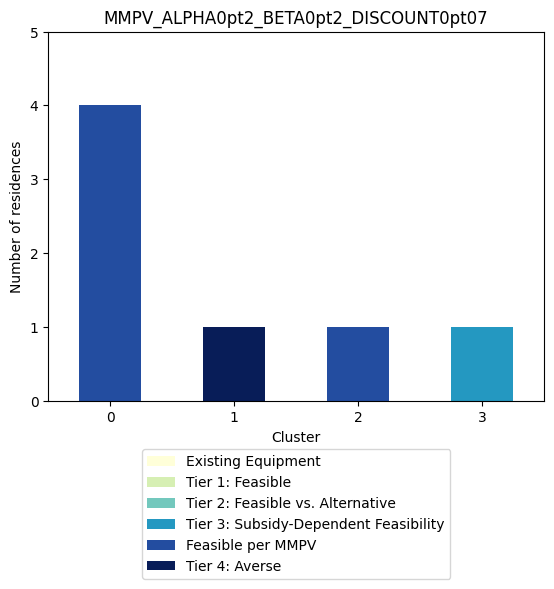

In [32]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

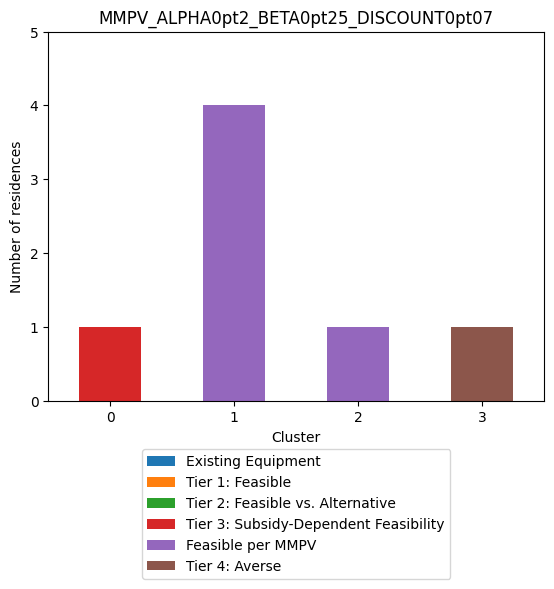

In [49]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt25_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


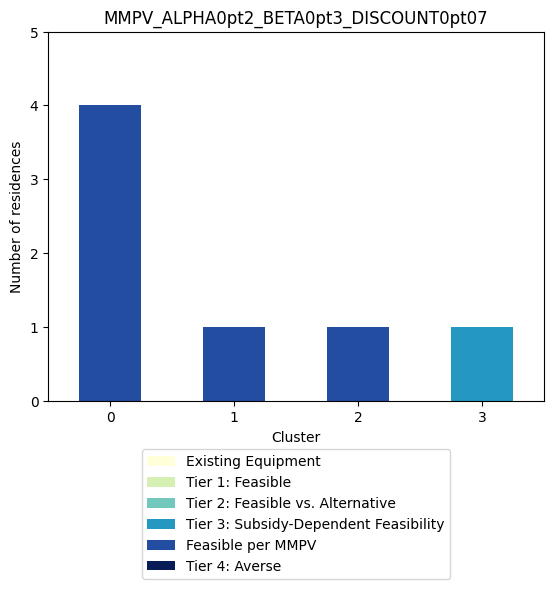

In [33]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt3_DISCOUNT0pt07", prefix="alpha_beta")

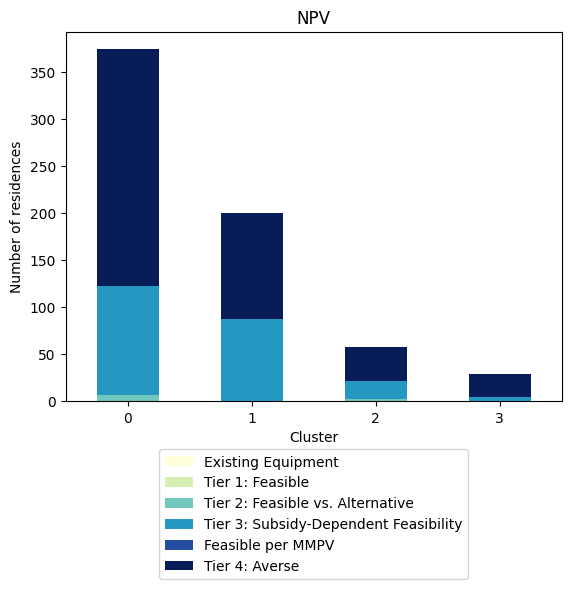

In [42]:
create_stacked_bar_chart(800, "NPV", prefix="alpha_beta")

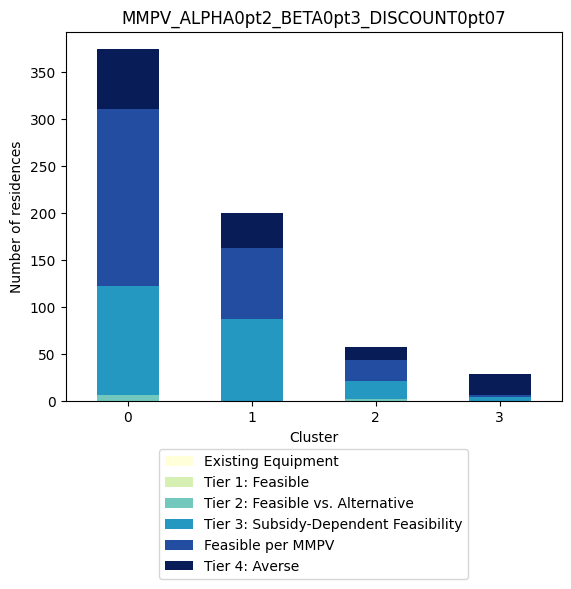

In [5]:
create_stacked_bar_chart(800, "MMPV_ALPHA0pt2_BETA0pt3_DISCOUNT0pt07", prefix="alpha_beta")